In [35]:
import pandas as pd

In [36]:
base= pd.read_csv("nations_gdp_life_pop_urban.csv", sep=';')
base.head()


,Unnamed: 0,country,region,gdp,life,pop,urban
0,1,Algeria,Africa,"7300,399902","72,31666565",34172236,"64,93333435"
1,2,Benin,Africa,"1338,800049","54,73333359",8237634,41
2,3,Botswana,Africa,"12307,40039","52,25",1941233,"59,25"
3,4,Burkina Faso,Africa,"1063,400024","53,78333282",15308383,"23,58333397"
4,5,Burundi,Africa,"349,2000122","48,86666489",7821783,"10,25"


### 2. Mostrar la informacion relativa a cada columna de la base de datos

In [37]:
base.info() # la función info nos permite visualizar las entradas no nulas de cada columna así como también el tipo de datos que la componen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  194 non-null    int64 
 1   country     194 non-null    object
 2   region      194 non-null    object
 3   gdp         179 non-null    object
 4   life        194 non-null    object
 5   pop         194 non-null    int64 
 6   urban       194 non-null    object
dtypes: int64(2), object(5)
memory usage: 10.7+ KB


In [38]:
base.dtypes

Unnamed: 0     int64
country       object
region        object
gdp           object
life          object
pop            int64
urban         object
dtype: object

### 3. Reescribr la informacion de las columnas 'gdp' y 'urban' como cifras decimales

In [39]:
# gdp ---> producto interno bruto
# urban --- > porcentaje de urbanización
# life ---> esperanza de vida

In [40]:
# Queremos extraer la columna gdp de la base de datos
base['gdp']=base['gdp'].str.replace(',','.').astype(float)
base['urban']=base['urban'].str.replace(',','.').astype(float)

### 4. Extraer los datos correspondientes a los paises europeos, cuyo porcentaje de urbanizacion es supeiorr al 60%

In [41]:
# Los datos que extraeremos deben cumplir dos condiciones: Deben ser de Europa y urb>60& ( en este caso, el conectivo lógico es 'y'=&)
# Si los datos deben cumplir una condición u otra: Conectivo lógico es 'o' (en python e)


In [42]:
base['region'].value_counts() #value_counts nos permite ver que valores toma una variable

region
Africa      52
Asia        49
Europe      43
Americas    35
Oceania     15
Name: count, dtype: int64

In [43]:
#se crea una nueva base de datos 
#considerando paises que vieien de Europa
base1=base[base['region']=='Europe']

In [44]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 136 to 178
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43 non-null     int64  
 1   country     43 non-null     object 
 2   region      43 non-null     object 
 3   gdp         39 non-null     float64
 4   life        43 non-null     object 
 5   pop         43 non-null     int64  
 6   urban       43 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.7+ KB


In [45]:
base1=base[(base['region']=='Europe') & (base['urban']>60)]

In [46]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 137 to 178
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     int64  
 1   country     32 non-null     object 
 2   region      32 non-null     object 
 3   gdp         29 non-null     float64
 4   life        32 non-null     object 
 5   pop         32 non-null     int64  
 6   urban       32 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ KB


### 5. Crear una nueva base de datos, que solo contenga no nulos del PIB

In [48]:
base.isnull().sum() # investigamos cuantas entradas nulas tiene cada variable. gdp en ingles

Unnamed: 0     0
country        0
region         0
gdp           15
life           0
pop            0
urban          0
dtype: int64

In [50]:
base.drop(base[base['gdp'].isnull()].index)
#.drop nos permite borrar caractersticias especificas de cada variable
#dataset.drop(dataset[dataset['columna1']].index)

,Unnamed: 0,country,region,gdp,life,pop,urban
0,1,Algeria,Africa,7300.399902,"72,31666565",34172236,64.933334
1,2,Benin,Africa,1338.800049,"54,73333359",8237634,41.000000
2,3,Botswana,Africa,12307.400390,"52,25",1941233,59.250000
3,4,Burkina Faso,Africa,1063.400024,"53,78333282",15308383,23.583334
4,5,Burundi,Africa,349.200012,"48,86666489",7821783,10.250000
...,...,...,...,...,...,...,...
188,189,Papua New Guinea,Oceania,1953.800049,"61,48333359",6474600,12.516666
189,190,Samoa,Oceania,4012.600098,"71,53333282",181600,20.666668
190,191,Solomon Islands,Oceania,2249.199951,"66,5",503617,17.766666
191,192,Tonga,Oceania,4072.199951,"71,83333588",102550,23.266666


In [51]:
base.dropna() #dropna borra todas las entradas njumericas nulas 

,Unnamed: 0,country,region,gdp,life,pop,urban
0,1,Algeria,Africa,7300.399902,"72,31666565",34172236,64.933334
1,2,Benin,Africa,1338.800049,"54,73333359",8237634,41.000000
2,3,Botswana,Africa,12307.400390,"52,25",1941233,59.250000
3,4,Burkina Faso,Africa,1063.400024,"53,78333282",15308383,23.583334
4,5,Burundi,Africa,349.200012,"48,86666489",7821783,10.250000
...,...,...,...,...,...,...,...
188,189,Papua New Guinea,Oceania,1953.800049,"61,48333359",6474600,12.516666
189,190,Samoa,Oceania,4012.600098,"71,53333282",181600,20.666668
190,191,Solomon Islands,Oceania,2249.199951,"66,5",503617,17.766666
191,192,Tonga,Oceania,4072.199951,"71,83333588",102550,23.266666


In [52]:
base.drop(base[(base['gdp'].isnull()) & (base['region']=='Oceania')].index)
#.drop nos permite borrar características especifícas de cada variable
# dataset.drop(dataset[dataset['columna1']].index)

,Unnamed: 0,country,region,gdp,life,pop,urban
0,1,Algeria,Africa,7300.399902,"72,31666565",34172236,64.933334
1,2,Benin,Africa,1338.800049,"54,73333359",8237634,41.000000
2,3,Botswana,Africa,12307.400390,"52,25",1941233,59.250000
3,4,Burkina Faso,Africa,1063.400024,"53,78333282",15308383,23.583334
4,5,Burundi,Africa,349.200012,"48,86666489",7821783,10.250000
...,...,...,...,...,...,...,...
188,189,Papua New Guinea,Oceania,1953.800049,"61,48333359",6474600,12.516666
189,190,Samoa,Oceania,4012.600098,"71,53333282",181600,20.666668
190,191,Solomon Islands,Oceania,2249.199951,"66,5",503617,17.766666
191,192,Tonga,Oceania,4072.199951,"71,83333588",102550,23.266666


In [53]:
base2=base.dropna() #dropna borra todas las entradas númericas nulas

## Ejemplo 2

In [55]:
bike=pd.read_excel("bike_price.xlsx",engine="openpyxl")

In [56]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bike_Age          276 non-null    float64
 1   Brand_Popularity  276 non-null    int64  
 2   Mileage           276 non-null    int64  
 3   Gear_Count        276 non-null    int64  
 4   Price             276 non-null    float64
 5   Bike_Weight       276 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 13.1 KB


In [59]:
bike['Bike_Weight']>10

0      False
1       True
2       True
3       True
4      False
       ...  
271     True
272     True
273     True
274     True
275     True
Name: Bike_Weight, Length: 276, dtype: bool

In [60]:
bike1=bike[bike['Bike_Weight']>10]

In [61]:
bike.isnull().sum

<bound method DataFrame.sum of      Bike_Age  Brand_Popularity  Mileage  Gear_Count  Price  Bike_Weight
0       False             False    False       False  False        False
1       False             False    False       False  False        False
2       False             False    False       False  False        False
3       False             False    False       False  False        False
4       False             False    False       False  False        False
..        ...               ...      ...         ...    ...          ...
271     False             False    False       False  False        False
272     False             False    False       False  False        False
273     False             False    False       False  False        False
274     False             False    False       False  False        False
275     False             False    False       False  False        False

[276 rows x 6 columns]>

### 5. Ordenar la columna Bike_Age de manera descendente

In [64]:
 #Hemos ordenado las entradas de esta columna de manera descendente con la funcion sort
bike.sort_values(by=['Bike_Age'],ascending=False)

,Bike_Age,Brand_Popularity,Mileage,Gear_Count,Price,Bike_Weight
252,9.9,25,3292,18,2363.24,13.8
16,9.9,15,1680,27,538.47,9.4
123,9.9,25,4612,24,-109.75,7.9
167,9.8,98,2413,24,16424.99,8.5
88,9.7,32,3628,24,4325.64,14.1
...,...,...,...,...,...,...
269,0.6,67,3716,21,13908.83,9.3
67,0.6,70,2714,18,14319.92,13.4
194,0.6,51,4020,18,12924.85,9.7
106,0.6,60,4667,21,14149.72,10.3


# Estadistica Descriptiva

## Medidas de tendencia central:
Las medidas de tendencia central, o medidas de centralización, son métricas estadísticas que indican el valor central de una distribución. Es decir, las medidas de tendencia central sirven para encontrar un valor representativo del centro de un conjunto de datos. Estas son:

1. Media muestral
2.  Moda muestral
3. Mediana Muestral

**Definición: Media Muestral**

Si las $n$ observaciones de una muestra se denotan por $x_1,x_2,\cdots,x_n$, entonces
$$
\bar{x}=\frac{x_1+x_2+\cdots+x_n}{n}=\frac{\sum_{i=1}^n x_i}{n}
$$

n= tamaño de la muestra

**Observación:**

Cuando disponemos de una tabla de datos acomulados, la media muestral se define como
$$
\bar{x}=\dfrac{\sum_i^n x_i f_i}{n}
$$

con,

$x_i=$ marca de clase

$f_i=$ frecuencia acomulada

### Histograma

Un histograma es un diagrama en el que se representa un conjunto de datos estadísticos mediante barras rectangulares, de manera que cada barra del histograma es proporcional a su frecuencia correspondiente.

Los histogramas sirven para representar gráficamente variables continua.

### Gráfica de barras

Una gráfica de barras, es una manera  de representar datos, mediante barras verticales u horizontales. La longitud de estas es proporcional a la magnitud que representan.

**Ejemplo**

La base de datos ‘tips‘ es un conjunto de datos que contiene información relacionada con propinas recolectadas
en un restaurante. El objetivo de su análisis es identificar y describir las características clave de las variables
que influyen en las propinas, así como las relaciones entre estas variables. Los datos contienen información sobre
las cuentas totales, propinas, características de los clientes (como su sexo y si son fumadores o no), además del
contexto temporal (día de la semana y momento del día en que se realizó la observación).


Para desarrollar esta actividad necesita cargar la base de datos desde la libreria seaborn siguiendo los siguientes
pasos:

Paso 1: Importar la librería seaborn utilizando import seaborn as ``sns``.

Paso 2: Cargar la base de datos de la librería utilizando ``sns.load dataset("tips")``.
Utilizando las librerías y funciones adecuada, responda las siguientes preguntas.

### 1. Determinar la propina media, que seule dejar el grupo de los fumadores

In [68]:
import seaborn as sns
import numpy as np

In [71]:
#tips es una base de datos que viene dentro de la libraria seaborn, precargadas en python
tip=sns.load_dataset('tips') 
# total_bill= cuenta total
# tip= propina
# sex= sexo
#smoker= fumador o no
#time= el momento del día donde se realizó la observación
# day= día de la semana donde se realizó la observación
#size= tamaño de la mesa

In [72]:
smokers=tip[tip['smoker']=='Yes'] # Hemos extraido la propina media de los fumadores

$$
\bar{x}=\frac{x_1+x_2+\cdots+x_n}{n}=\frac{\sum_{i=1}^n x_i}{n}
$$

In [75]:
media=smokers['tip'].mean() #Calcular la propina media del grupo antes mencionado

In [76]:
print(f"La propina media del grupo de fumadores es: {round(media,5)}")

La propina media del grupo de fumadores es: 3.00871


### 2. Realice un histograma que permita visualizar la curva de densidad y la media de la variable 'tip' bajo estás condiciones. Además, importar a su computador esta imagen

In [79]:
import matplotlib.pyplot as plt #Al igual que seaborn, matplotlib nos permite trbajar con grafica 

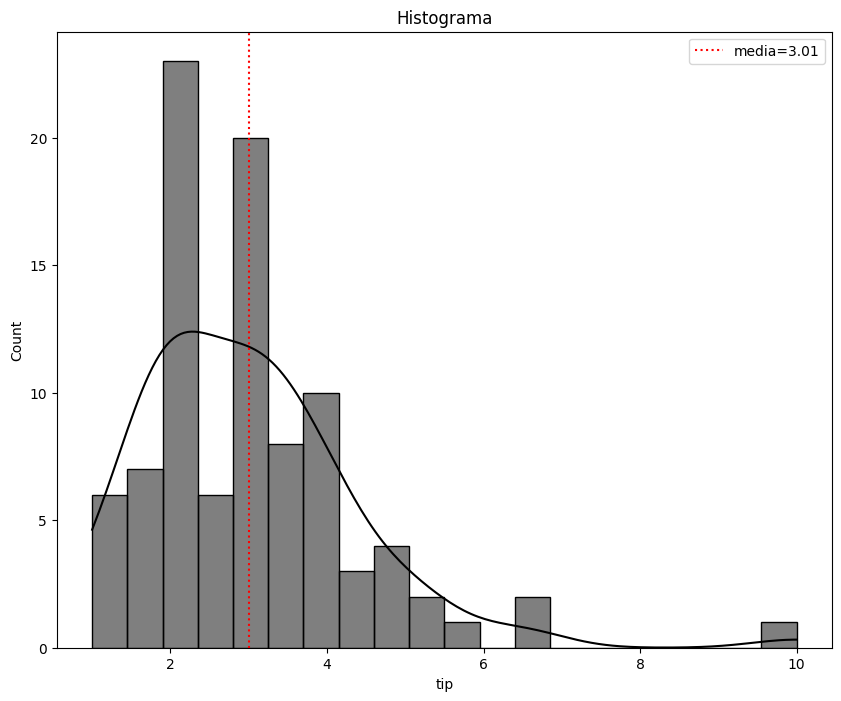

In [94]:
fig=plt.figure(figsize=(10,8))
sns.histplot(smokers['tip'], kde=True, bins=20, color='black')
#La propina media
plt.axvline(media, color='red', linestyle=':', label=f'media={round(media,2)}') #
plt.legend() #Visualizar las etiquetas
plt.title('Histograma')
plt.savefig('histograma.png')
plt.show() #plt.show() termina la grafica
#Se debe visualizar la media de las propinas correspondiente a este grupo


### 3. Determinar el total facturado medio, correspondiente a las mesas que son ocupadas por 3 individuos o más y que asisten a cenar.

In [95]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [98]:
#size = corresponde al tamanho de la mesa
#time = momento del dia donde se realizo la observacion/ 
tip[(tip['size']>3) & (tip['time']=='Dinner')].head()

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
13,18.43,3.00,Male,No,Sun,Dinner,4


In [101]:
factura_media=tip[(tip['size']>3) & (tip['time']=='Dinner')]['total_bill'].mean()
print(f"La factura promedio es: {round(factura_media,2)}")

La factura promedio es: 28.82


### 4. Realizar una gráfica de barras para el momento del día donde se realizó la transacción y el total promedio facturado

**Gráfica de barras**

Una gráfica de barras, es una manera  de representar datos, mediante barras verticales u horizontales. La longitud de estas es proporcional a la magnitud que representan.

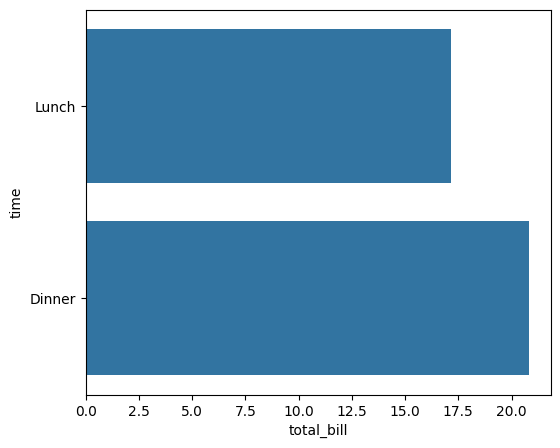

In [105]:
#Gráfica de barras para el momento del día donde se realizó la transacción y el total de la cuenta, agrupar por sexos la variable time
#hue= Agrupar por categorias
fig=plt.figure(figsize=(6,5))
sns.barplot(x='total_bill', y='time', data=tip,errorbar=None) #de seaborn exportamos la grafica de barras
plt.show()

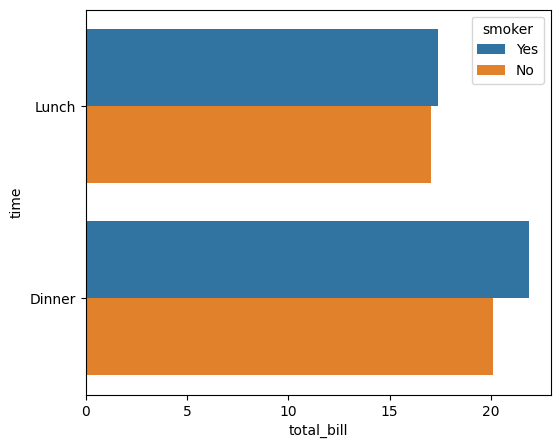

In [106]:
# subcategorias
# Agrupar por subcategoria smoker
fig=plt.figure(figsize=(6,5))
sns.barplot(x='total_bill',y='time',data=tip,estimator='mean',errorbar=None,hue='smoker') # de seaborn exportamos la gráfica de barras
plt.show()

In [107]:
tip['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64